In [67]:
import numpy as np
import pandas as pd
import sys, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import shared.util

%matplotlib inline

os.chdir('Z:/people/Abel/arena-automation/data')

In [151]:
d = shared.util.loadFlySim('2016-12-14 12-10-17.msgpack')

In [152]:
def f(x):
    x['minz'] = x['flysim.z'].min()
    return x
d = d.groupby(['trajectory',]).apply(f)

In [153]:
def f(x):
    x['zspan'] = x['flysim.z'].max() - x['flysim.z'].min()
    return x
d = d.groupby(['trajectory',]).apply(f)

In [ ]:
d[d.trajectory==5]

In [154]:
d.trajectory.unique()

array([  19,   44,   66,  158,  136,  204,  235,   60,  280,  255,  352,
        331,  339,  354,  361,  370,  364,  388,  398,  401,  415,  462,
        416,  466,  453,  523,  498,  538,  557,  535,  554,  592,  602,
        570,  577,  632,  610,  638,  648,  528,  613,  625,  546,  659,
        668,  676,  681,  699,  617,  673,  665,  736,  762,  469,  804,
        809,  627,  818,  833,  813,  866,  847,  881,  910,  909,  716,
        923,  693,  937,  948,  986,  996,  950, 1011, 1038, 1072, 1084,
       1150, 1161, 1125, 1208, 1196, 1170,  548, 1217, 1215, 1180, 1256,
       1250, 1289, 1280, 1030, 1302, 1339, 1301, 1355, 1327, 1386, 1374,
       1366, 1385, 1402, 1446, 1466, 1476,  867, 1492, 1495, 1536, 1566,
       1586, 1629, 1662, 1652, 1690, 1743, 1779, 1729, 1787, 1801, 1741,
       1820, 1324, 1826, 1886, 1890,  444, 1838, 1855, 1877, 1856, 1830,
       1870, 1910, 1941, 1919, 1939, 2002, 2009, 2014, 2044, 2049, 2079,
       2100, 2126, 1959, 2115, 1967, 2149, 2160, 21

In [87]:
d[d.trajectory==5]['flysim.z']

0      544.015381
1      543.897644
2      543.713501
3      543.664551
4      543.538269
5      543.557556
6      543.463379
7      543.424866
8      543.394470
9      543.366821
10     543.322571
11     543.331909
12     543.282288
13     543.200195
14     543.096008
15     543.126831
16     543.096069
17     542.989075
18     542.953552
19     542.851990
20     542.711121
21     542.641541
22     542.522949
23     542.514526
24     542.486572
25     542.334595
26     542.269287
27     542.187805
28     542.086731
29     541.973572
          ...    
484    531.599182
485    531.521484
486    531.247559
487    531.223083
488    531.351013
489    530.936401
490    531.015808
491    531.039429
492    530.893799
493    530.660522
494    530.586121
495    530.501465
496    530.192078
497    530.372986
498    530.567261
499    530.567505
500    530.165588
501    530.373413
502    529.837463
503    529.601196
504    529.065430
505    529.529541
506    529.298035
507    529.065369
508    528

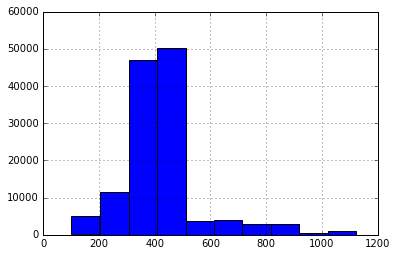

In [155]:
d.minz[d.minz>100].hist()

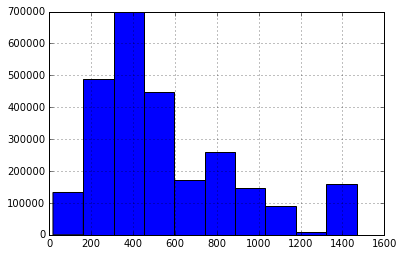

In [156]:
d.zspan.hist()

In [83]:
sum(d.flysimTraj==d.trajectory) / d.shape[0]

0.14237614252079492

In [ ]:
[x for x in zip(d.flysimTraj[0:10000], d.trajectory[0:10000])]

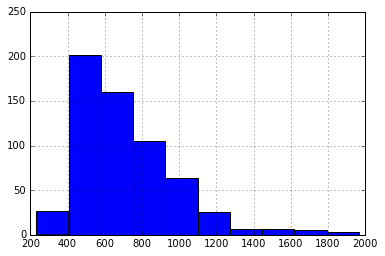

In [96]:
a = d.groupby('trajectory')['trajectory'].count()
a = a[a < 2000]
a.hist()

In [99]:
d[d.minz>200].shape

(610, 21)

In [55]:
dnnan = d[~np.isnan(d.minz)]
dnnan.shape

(653, 21)

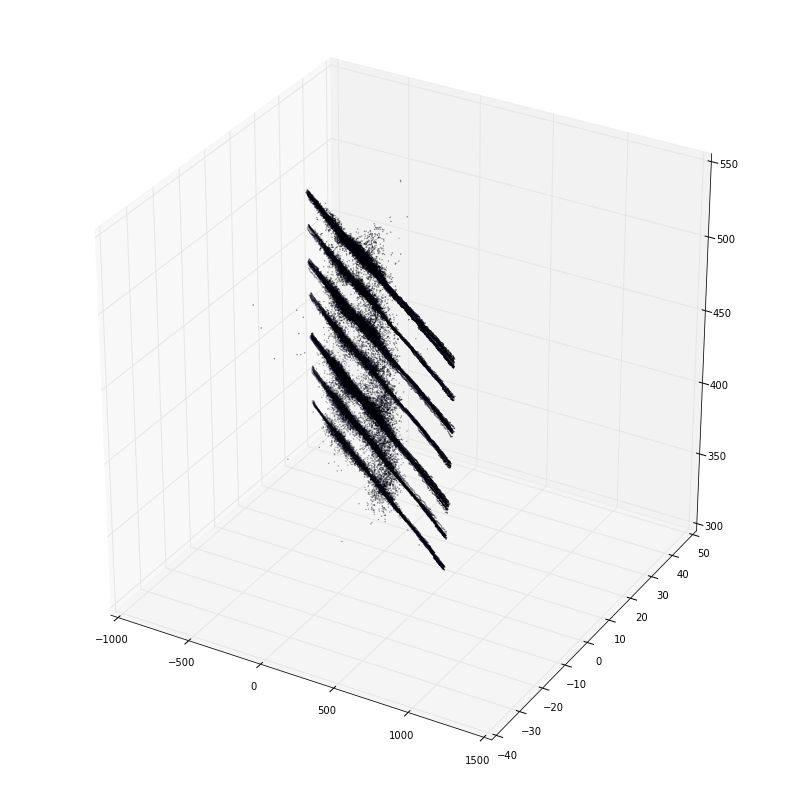

In [158]:
#pos = d[d.trajectory==25378].as_matrix(['flysim.x','flysim.y','flysim.z'])
dnnan = d[ (d.zspan<50) & (d.minz>100) ]
pos = dnnan.as_matrix(['flysim.x','flysim.y','flysim.z'])
fig = plt.figure(figsize=(14,14))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pos[:,0],pos[:,1],pos[:,2], s=0.1)